![alt text](image.png)

In [89]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns

In [90]:
# load customer credit risk data
df = pd.read_csv("C:\\23B81A67A6\\Tekworks\\Supervised_ML_Models\\KNN\\Tasks\\Datasets\\credit_risk_dataset.csv")
# view first 5 records
df.head()
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [91]:
# 3. Select 4 numerical features
X = df[['person_age',
        'person_income',
        'loan_amnt',
        'cb_person_cred_hist_length']]

y = df['loan_status']

In [92]:
# 4. Train-test split (FIRST)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [93]:
# 5. Feature scaling (FIT ONLY ON TRAIN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# 6. KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [95]:
# 7. Train
knn.fit(X_train_scaled, y_train)


# 8. Predict
y_pred = knn.predict(X_test_scaled)

In [100]:
# 9. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.7965321466932638


In [99]:
#classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5072
           1       0.57      0.34      0.43      1445

    accuracy                           0.80      6517
   macro avg       0.70      0.63      0.65      6517
weighted avg       0.77      0.80      0.78      6517



<Axes: >

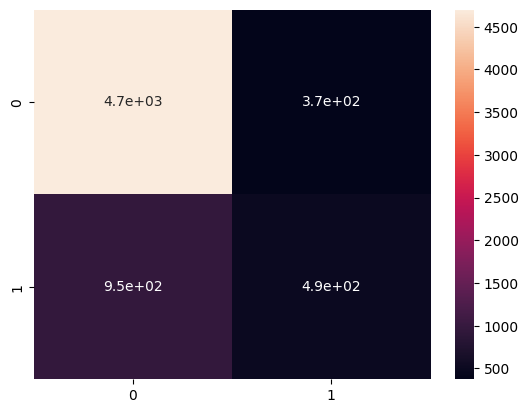

In [98]:
#confusion matrix 
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [101]:
# 10. Try different K values
print("\nTesting different K values:")
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print("K =", k, "Accuracy =", accuracy_score(y_test, y_pred))


Testing different K values:
K = 3 Accuracy = 0.7784256559766763
K = 5 Accuracy = 0.7965321466932638
K = 7 Accuracy = 0.8026699401565137
K = 9 Accuracy = 0.8046647230320699


In [102]:
# 11. New customer prediction
new_customer = [[28, 450000, 180000, 5]]
new_customer_scaled = scaler.transform(new_customer)

prediction = knn.predict(new_customer_scaled)
print("\nNew Customer Risk:",
      "High Risk" if prediction[0] == 1 else "Low Risk")


New Customer Risk: Low Risk


C:\Users\sathy\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
